# Experiment 4

### Aim: Implementation of Autoencoders for dimentionality reduction in Python

### Theory:
Autoencoders are a type of artificial neural network used for dimensionality reduction, feature learning, and data compression. They work by training a network to encode input data into a lower-dimensional representation and then decode it back to reconstruct the original input. The primary idea is to learn a compact and informative representation of the data.


1. Architecture:

An autoencoder consists of two main parts:

Encoder: This part takes the input data and maps it to a lower-dimensional representation. It is composed of a series of layers (typically fully connected layers or convolutional layers) that reduce the dimensionality of the data.

Decoder: The decoder takes the encoded representation and attempts to reconstruct the original data. Like the encoder, it consists of layers that increase the dimensionality back to the original data size.

The number of neurons or units in the bottleneck layer, where the dimensionality is reduced, determines the level of compression. Smaller bottleneck layers result in more aggressive dimensionality reduction.

2. Objective:

The main objective of training an autoencoder is to minimize the reconstruction error. This error is usually measured using a loss function, such as mean squared error (MSE) for continuous data or binary cross-entropy for binary data. During training, the network learns the most essential features and patterns in the data that are necessary for good reconstruction.

3. Bottleneck Layer:

The bottleneck layer, also known as the latent space or encoding layer, is the core of dimensionality reduction. It captures the most critical information from the input data. By forcing the network to represent the data in this compressed form, autoencoders can effectively reduce the dimensionality while preserving important features.

4. Variants:

There are various autoencoder variants tailored to different types of data and tasks:

Denoising Autoencoder: These autoencoders are trained to recover the original data from noisy or corrupted versions. They help in learning robust representations.

Sparse Autoencoder: Sparse autoencoders introduce sparsity constraints on the activations of the hidden units, encouraging them to be selective in what they learn.

Variational Autoencoder (VAE): VAEs combine autoencoders with probabilistic modeling. They generate data points by sampling from a probability distribution in the latent space, allowing for the generation of new data.

5. Use Cases:

Autoencoders find applications in various domains:

Dimensionality Reduction: They are used to reduce the dimensionality of data, particularly in high-dimensional spaces, making it easier to visualize and analyze data.

Anomaly Detection: Autoencoders can be used to detect anomalies or outliers by reconstructing data points and measuring the reconstruction error. Anomalies often result in higher reconstruction errors.

Feature Learning: Autoencoders are utilized to learn informative representations from the data, which can be further used for downstream machine learning tasks.

Image Compression: They can be used to compress images, where the encoder learns a compact representation and the decoder reconstructs the image.

In summary, autoencoders are neural network architectures used for dimensionality reduction and feature learning. They learn to represent data in a lower-dimensional space, making them valuable tools for various machine learning and data analysis tasks.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

print(len(train_dataset))
print(len(train_loader))

100%|██████████| 9912422/9912422 [00:00<00:00, 175134529.01it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44274741.89it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23418613.95it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19050528.77it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

60000
938


In [4]:
input_dim = 28 * 28
encoding_dim = 64
autoencoder = Autoencoder(input_dim, encoding_dim)


criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [5]:
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)  # Flatten

        optimizer.zero_grad()

        # Forward
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")

print("Training complete!")

Epoch [1/10] Loss: 0.0178
Epoch [2/10] Loss: 0.0089
Epoch [3/10] Loss: 0.0072
Epoch [4/10] Loss: 0.0075
Epoch [5/10] Loss: 0.0067
Epoch [6/10] Loss: 0.0063
Epoch [7/10] Loss: 0.0057
Epoch [8/10] Loss: 0.0053
Epoch [9/10] Loss: 0.0043
Epoch [10/10] Loss: 0.0043
Training complete!


In [6]:
encoded_data = autoencoder.encoder(inputs)

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
encoded_data_2d = pca.fit_transform(encoded_data.detach().numpy())

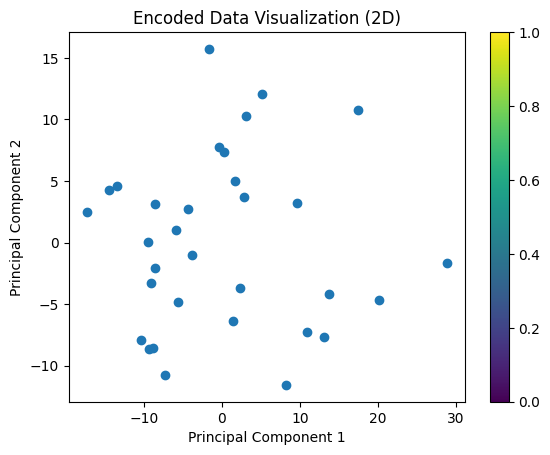

In [10]:
plt.scatter(encoded_data_2d[:, 0], encoded_data_2d[:, 1])
plt.title("Encoded Data Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()